# 1. Import package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import re

In [2]:
import seaborn

# 2. Load dataset

In [3]:
df = pd.read_csv('metadata.csv',sep=',')

In [4]:
df.describe()

,pubmed_id,Microsoft Academic Paper ID
count,3.805800e+04,9.640000e+02
mean,2.214046e+07,2.709918e+09
std,7.597395e+06,4.839708e+08
min,2.142000e+03,3.912630e+07
25%,1.753129e+07,2.393002e+09
50%,2.356957e+07,3.003251e+09
75%,2.819832e+07,3.005639e+09
max,3.227889e+07,3.006672e+09


In [5]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350.0,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


# 3. Cleaning data

In [6]:
full_paper_sha = df[~df['sha'].isnull() & df['has_pdf_parse'] == True].copy()

In [7]:
full_paper_sha.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
5,qj4dh6rg,3ed670f60a7be2e3e2a991ea8af1fdd5fa5e2b2c,PMC,Cloaked similarity between HIV-1 and SARS-CoV ...,10.1186/1471-2180-3-20,PMC222911,14499001.0,no-cc,BACKGROUND: Severe acute respiratory syndrome ...,2003-09-21,"Kliger, Yossef; Levanon, Erez Y",BMC Microbiol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


In [8]:
len(full_paper_sha)

39024

In [9]:
full_paper_sha.describe()

,pubmed_id,Microsoft Academic Paper ID
count,2.909800e+04,4.140000e+02
mean,2.300313e+07,2.766824e+09
std,7.042892e+06,4.280675e+08
min,2.142000e+03,1.776631e+08
25%,1.883269e+07,2.648807e+09
50%,2.431374e+07,3.003808e+09
75%,2.854250e+07,3.005657e+09
max,3.227889e+07,3.006672e+09


## 3.1 Publish time

In [10]:
month_str = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 
                    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12, 'Spr': 3, 'Sum': 6, 'Aut': 9, 'Win': 12}

In [11]:
def is_in_month_str(x):
    in_month_str = False;
    for key, val in month_str.items():
        if re.search(key, x):
            formatA = True   
    
    return in_month_str

In [12]:
def to_date_time(x):
    x = str(x) # To string x
    x = x.strip() # Remove some space in first and last of string
    
    if is_in_month_str(x):
        try:
            year = int(x[:4])
        except:
            year = 1900

        month = monthStr.get(x[5:8],1)

        try:
            day = int(x[9:11])
        except:
            day = 1
    else:
        try:
            year = int(x[:4])
        except:
            year = 1900

        try:
            month = int(x[5:7])
        except:
            month = 1

        try:
            day = int(x[8:])
        except:
            day = 1
        
    return datetime.datetime(year, month, day)

In [13]:
# 2017 Sep 6

In [14]:
# to_date_time('2017 May 19')

In [15]:
# to_date_time('2009-06-30')

In [16]:
full_paper_sha['publish_time'] = full_paper_sha['publish_time'].apply(to_date_time)

In [17]:
len(full_paper_sha)

39024

In [18]:
def datetime_to_float(d):
    return d.timestamp()

In [19]:
full_paper_sha['publish_time_float'] = full_paper_sha['publish_time'].copy()

In [20]:
full_paper_sha['publish_time_float'] = full_paper_sha['publish_time'].apply(datetime_to_float)

In [21]:
full_paper_sha.describe()

,pubmed_id,Microsoft Academic Paper ID,publish_time_float
count,2.909800e+04,4.140000e+02,3.902400e+04
mean,2.300313e+07,2.766824e+09,1.345858e+09
std,7.042892e+06,4.280675e+08,2.441935e+08
min,2.142000e+03,1.776631e+08,-3.919104e+08
25%,1.883269e+07,2.648807e+09,1.236902e+09
50%,2.431374e+07,3.003808e+09,1.408450e+09
75%,2.854250e+07,3.005657e+09,1.524614e+09
max,3.227889e+07,3.006672e+09,1.609373e+09


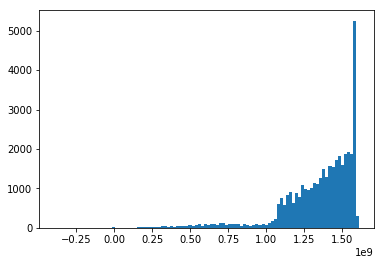

In [22]:
plt.hist(full_paper_sha['publish_time_float'], bins=100);

In [23]:
full_paper_sha.to_csv('full_paper_sha.csv', index = False)

## 3.2 Source X

In [24]:
full_paper_sha['source_x'].unique()

array(['PMC', 'Elsevier', 'CZI', 'biorxiv', 'medrxiv'], dtype=object)

## 3.3 Microsoft Academic Paper ID

In [25]:
full_paper_sha['Microsoft Academic Paper ID'].nunique()

346

In [26]:
microsoft_id = full_paper_sha[~full_paper_sha['Microsoft Academic Paper ID'].isnull()]

In [27]:
none_microsoft_id = full_paper_sha[full_paper_sha['Microsoft Academic Paper ID'].isnull()]

In [28]:
len(microsoft_id)

414

## 3.4 Journal

In [29]:
full_paper_sha['journal'].nunique()

5604

In [30]:
journal = full_paper_sha[~full_paper_sha['journal'].isnull()]

In [31]:
len(journal)

36920

In [32]:
from collections import Counter

In [33]:
journal_freq = Counter(list(journal['journal']))

In [34]:
journal_freq = pd.DataFrame(list(journal_freq.items()), columns = ['journal', 'freq'])

In [35]:
journal_freq = journal_freq.sort_values( by = ['freq'], ascending=False)

In [36]:
journal_freq = journal_freq.head(100)

In [37]:
journal_freq.to_csv('journal_top.csv', index = False)

In [38]:
none_journal = full_paper_sha[full_paper_sha['journal'].isnull()]

In [39]:
len(none_journal)

2104

## 3.5 License

In [40]:
full_paper_sha['license'].nunique()

13

In [41]:
license = full_paper_sha['license']

In [42]:
len(license)

39024

## 3.6 Authors

In [43]:
authors = full_paper_sha[~full_paper_sha['authors'].isnull()]

In [44]:
len(authors)

38420

In [45]:
none_authors = full_paper_sha[full_paper_sha['authors'].isnull()]

In [46]:
def to_list(x):
    import re
    try:
        temp_authors = re.split(';', x)
        return [author.strip() if author.strip()[-1] != '.' else author.strip()[:-1] for author in temp_authors]
    except:
        print('error')
        return []

In [47]:
to_list( 'Theodore A; Johnston.')

['Theodore A', 'Johnston']

In [48]:
len(none_authors)

604

In [49]:
authors_freq = {}

In [50]:
for author_list in authors['authors'].apply(to_list):
    for author in author_list:
        authors_freq[author] = authors_freq.get(author, 0) + 1

In [51]:
authors_freq = pd.DataFrame(list(authors_freq.items()), columns = ['author', 'freq'])

In [52]:
authors_freq = authors_freq.sort_values(by = ['freq'], ascending= False)

In [53]:
authors_freq

,author,freq
259,"Drosten, Christian",121
3491,"Yuen, Kwok-Yung",119
19031,"Memish, Ziad A",119
4585,"Jiang, Shibo",106
2798,"Perlman, Stanley",101
...,...,...
62277,"Cameron, Robert J",1
62276,"Saxena, Meeta",1
62274,"Reichling, J",1
62273,"Schnitzler, P",1


In [62]:
authors_freq = authors_freq.head(100)

In [63]:
authors_freq.to_csv('author_top_group_1.csv', index = False)

In [70]:
authors_freq_a = {}

In [71]:
for author_list in authors['authors'].apply(to_list):
    for index, author in enumerate(author_list):
        authors_freq_a[author] = authors_freq_a.get(author, 0) + max(1, (5-index))
#         authors_freq_a[author] = authors_freq_a.get(author, 0) + 1

In [72]:
authors_freq_a = pd.DataFrame(list(authors_freq_a.items()), columns = ['author', 'weight'])

In [73]:
authors_freq_a = authors_freq_a.sort_values(by = ['weight'], ascending= False)

In [74]:
authors_freq_a = authors_freq_a.head(100)

In [75]:
authors_freq_a.to_csv('author_top_group_2.csv', index = False)